# Bandit Problem

In [14]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [15]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [16]:
bandits[0].pullLever()

1.8638874025508287

## Greedy algorithm Implementation

In [17]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    Q=np.full(10,0)
    rewards=[]
    steps=[0,0,0,0,0,0,0,0,0,0]
    for i in range(10000):
        max_val=np.max(Q)
        candidates=[i for i, q in enumerate(Q) if q==max_val]
        a=random.choice(candidates)
        curreward=bandits[a].pullLever()
        Q[a]=(Q[a]*steps[a]+curreward)/(steps[a]+1)
        steps[a]+=1
        rewards.append(curreward)
    return rewards

    pass

Plot the cumulative average of rewards as the number of iterations increases.

In [18]:
rewards = run_greedy()
avgreward=[]
sum=0
count=0
for i in rewards:
    sum+=i
    count+=1
    avgreward.append(sum/count)


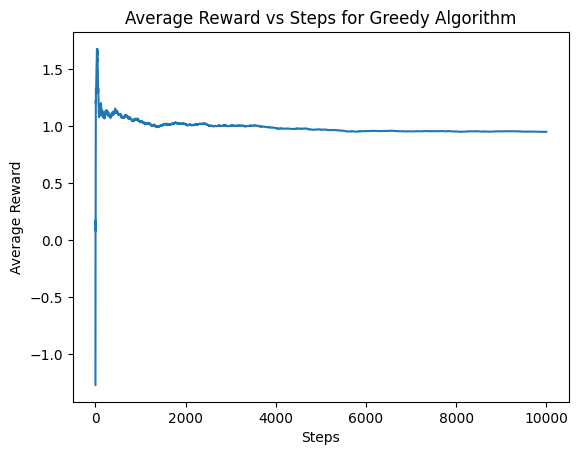

In [19]:
plt.plot(avgreward)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps for Greedy Algorithm')
plt.show()

## $\epsilon$-greedy Algorithm

In [20]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    Q=np.full(10,0)
    rewards=[]
    steps=[0,0,0,0,0,0,0,0,0,0]
    for i in range(10000):
        if random.random()<epsilon:
                randindex=random.randint(0,9)
                curreward=bandits[randindex].pullLever()
                Q[randindex]=(Q[randindex]*steps[randindex]+curreward)/(steps[randindex]+1)
                steps[randindex]+=1
                rewards.append(curreward)
        else:
            max_val=np.max(Q)
            candidates=[i for i, q in enumerate(Q) if q==max_val]
            a=random.choice(candidates)
            curreward=bandits[a].pullLever()
            Q[a]=(Q[a]*steps[a]+curreward)/(steps[a]+1)
            steps[a]+=1
            rewards.append(curreward)
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [21]:
reward1 = run_epsilon_greedy(0.1)
avgreward1=[]
sum=0
count=0
for i in reward1:
    sum+=i
    count+=1
    avgreward1.append(sum/count)
reward2 = run_epsilon_greedy(0.01)
avgreward2=[]  
sum=0
count=0
for i in reward2:
    sum+=i
    count+=1
    avgreward2.append(sum/count)

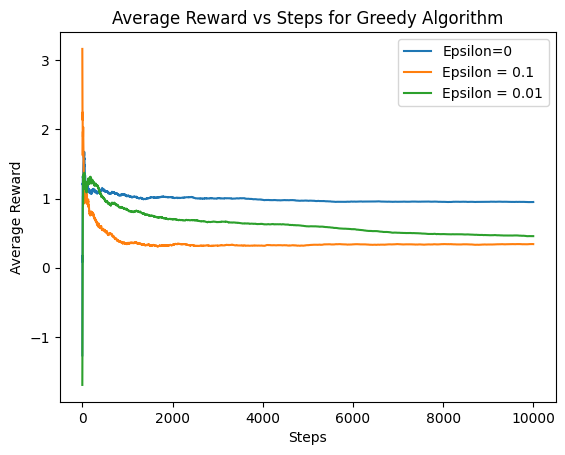

In [22]:
plt.plot(avgreward, label='Epsilon=0')
plt.plot(avgreward1, label='Epsilon = 0.1')
plt.plot(avgreward2, label='Epsilon = 0.01')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps for Greedy Algorithm')
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [23]:
def averagelist(rewards):
    avgreward=[]
    sum=0
    count=0
    for i in rewards:
        sum+=i
        count+=1
        avgreward.append(sum/count)
    return avgreward

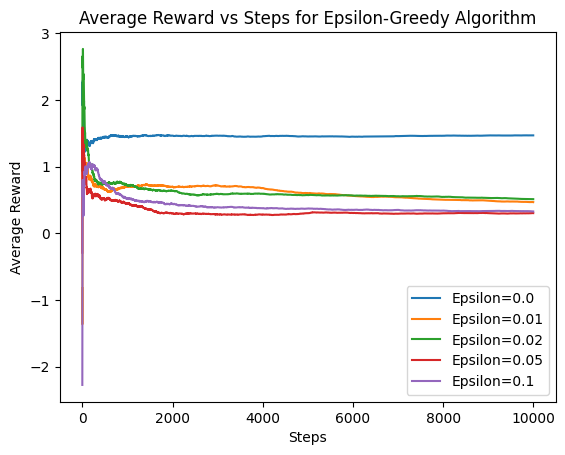

In [24]:
epsilons=[0.00, 0.01, 0.02, 0.05,0.1]
for i in epsilons:
    rewards = run_epsilon_greedy(i)
    avgreward=averagelist(rewards)
    plt.plot(avgreward, label=f'Epsilon={i}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps for Epsilon-Greedy Algorithm')
plt.legend()
plt.show()

## Optimistic Initial Values

In [25]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here
    Q=np.full(10, 10.0)
    rewards=[]
    epsilon=0.1
    steps=[0,0,0,0,0,0,0,0,0,0]
    for i in range(10000):
        if random.random()<epsilon:
                randindex=random.randint(0,9)
                curreward=bandits[randindex].pullLever()
                Q[randindex]=(Q[randindex]*steps[randindex]+curreward)/(steps[randindex]+1)
                steps[randindex]+=1
                rewards.append(curreward)
        else:
            max_val=np.max(Q)
            candidates=[i for i, q in enumerate(Q) if q==max_val]
            a=random.choice(candidates)
            curreward=bandits[a].pullLever()
            Q[a]=(Q[a]*steps[a]+curreward)/(steps[a]+1)
            steps[a]+=1
            rewards.append(curreward)
    return rewards
    # Return the reward from the bandits in a list
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [26]:
avgrewardopt=averagelist(run_optimistic_greedy())

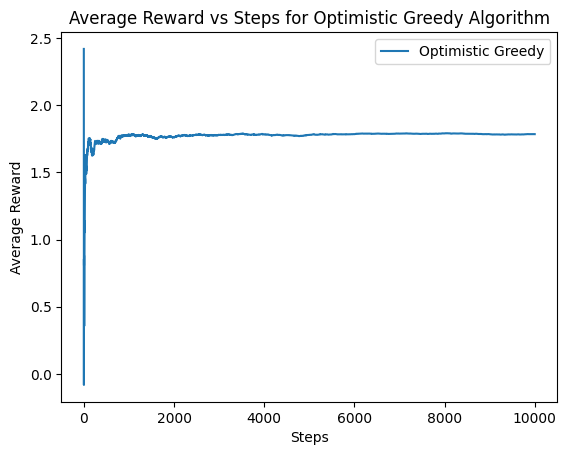

In [27]:
plt.plot(avgrewardopt, label='Optimistic Greedy')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps for Optimistic Greedy Algorithm')
plt.legend()
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [28]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass